In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
from pandas.tools.plotting import scatter_matrix

df = pd.read_csv('MuRun2010B.csv')
df.head()

,Run,Event,Type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,Type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,146436,90830792,G,19.17120,3.817130,9.04323,-16.46730,9.81583,-1.289420,1.171390,...,T,5.43984,-0.362592,2.626990,-4.748490,2.65189,-1.345870,1.707960,1,2.73205
1,146436,90862225,G,12.94350,5.125790,-3.98369,-11.19730,6.49180,-1.313350,-0.660674,...,G,11.86360,4.789840,-6.262220,-8.864340,7.88403,-0.966622,-0.917841,1,3.10256
2,146436,90644850,G,12.39990,-0.849742,9.40110,8.04015,9.43943,0.772580,1.660940,...,G,8.55532,-4.851550,6.976960,-0.983229,8.49797,-0.115445,2.178410,-1,9.41149
3,146436,90678594,G,17.81320,-1.959590,2.80531,17.48110,3.42195,2.333500,2.180530,...,G,9.42174,4.365230,0.168017,8.347130,4.36846,1.403000,0.038471,1,7.74702
4,146436,90686690,G,7.95664,7.097000,-1.31646,3.34613,7.21806,0.448399,-0.183411,...,T,5.44467,-1.341760,1.386470,5.090250,1.92941,1.697380,2.339810,-1,8.67727


In [ ]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
df[df.E1 < 100].E1.hist(bins=500,histtype=u'stepfilled')
df[df.E2 < 100].E2.hist(bins=500,histtype=u'stepfilled')

fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
df[df.M > 80].M.hist(bins=50,histtype=u'stepfilled')

In [2]:
muon = df[df.E1 < 100]
muon = muon[muon.E2 < 100]
muon = muon[abs(muon.px1) < 40]
muon = muon[abs(muon.px2) < 40]
muon = muon[abs(muon.py1) < 40]
muon = muon[abs(muon.py2) < 40]
muon = muon[abs(muon.pt1) < 40]
muon = muon[abs(muon.pt2) < 40]
muon = muon.drop(['Event','Run','Type1','Type2','Q1','Q2'],axis=1)
#muon

In [ ]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
muon.px1.hist(bins=500,histtype=u'stepfilled')
muon.px2.hist(bins=500,histtype=u'stepfilled')

In [ ]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
muon.py1.hist(bins=500,histtype=u'stepfilled')
muon.py2.hist(bins=500,histtype=u'stepfilled')

In [ ]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
muon.pz1.hist(bins=500,histtype=u'stepfilled')
muon.pz2.hist(bins=500,histtype=u'stepfilled')

In [ ]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
muon.E1.hist(bins=500,histtype=u'stepfilled')
muon.E2.hist(bins=500,histtype=u'stepfilled')

In [ ]:
energy = muon.E1 + muon.E2
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
plt.hist(energy,bins=500,histtype=u'stepfilled')
plt.hist(muon.E1,bins=500,histtype=u'stepfilled')
plt.hist(muon.E2,bins=500,histtype=u'stepfilled')
plt.show()

In [ ]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
plt.hist2d(muon.px1,muon.px2,bins=500,cmap='viridis')
plt.show()

In [ ]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
plt.hist2d(muon.py1,muon.py2,bins=500,cmap='viridis')
plt.show()

In [ ]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
plt.hist2d(muon.pt1,muon.pz1,bins=500,cmap='viridis')
plt.show()

In [ ]:
#ax = scatter_matrix(muon, alpha=0.2, figsize=(20, 15),diagonal='kde')

In [ ]:
muon.info()

In [ ]:
muon.describe()

In [ ]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
muon[muon.M < 20].M.hist(bins=500,histtype=u'stepfilled')

In [ ]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
muon[muon.M > 60].M.hist(bins=100,histtype=u'stepfilled')

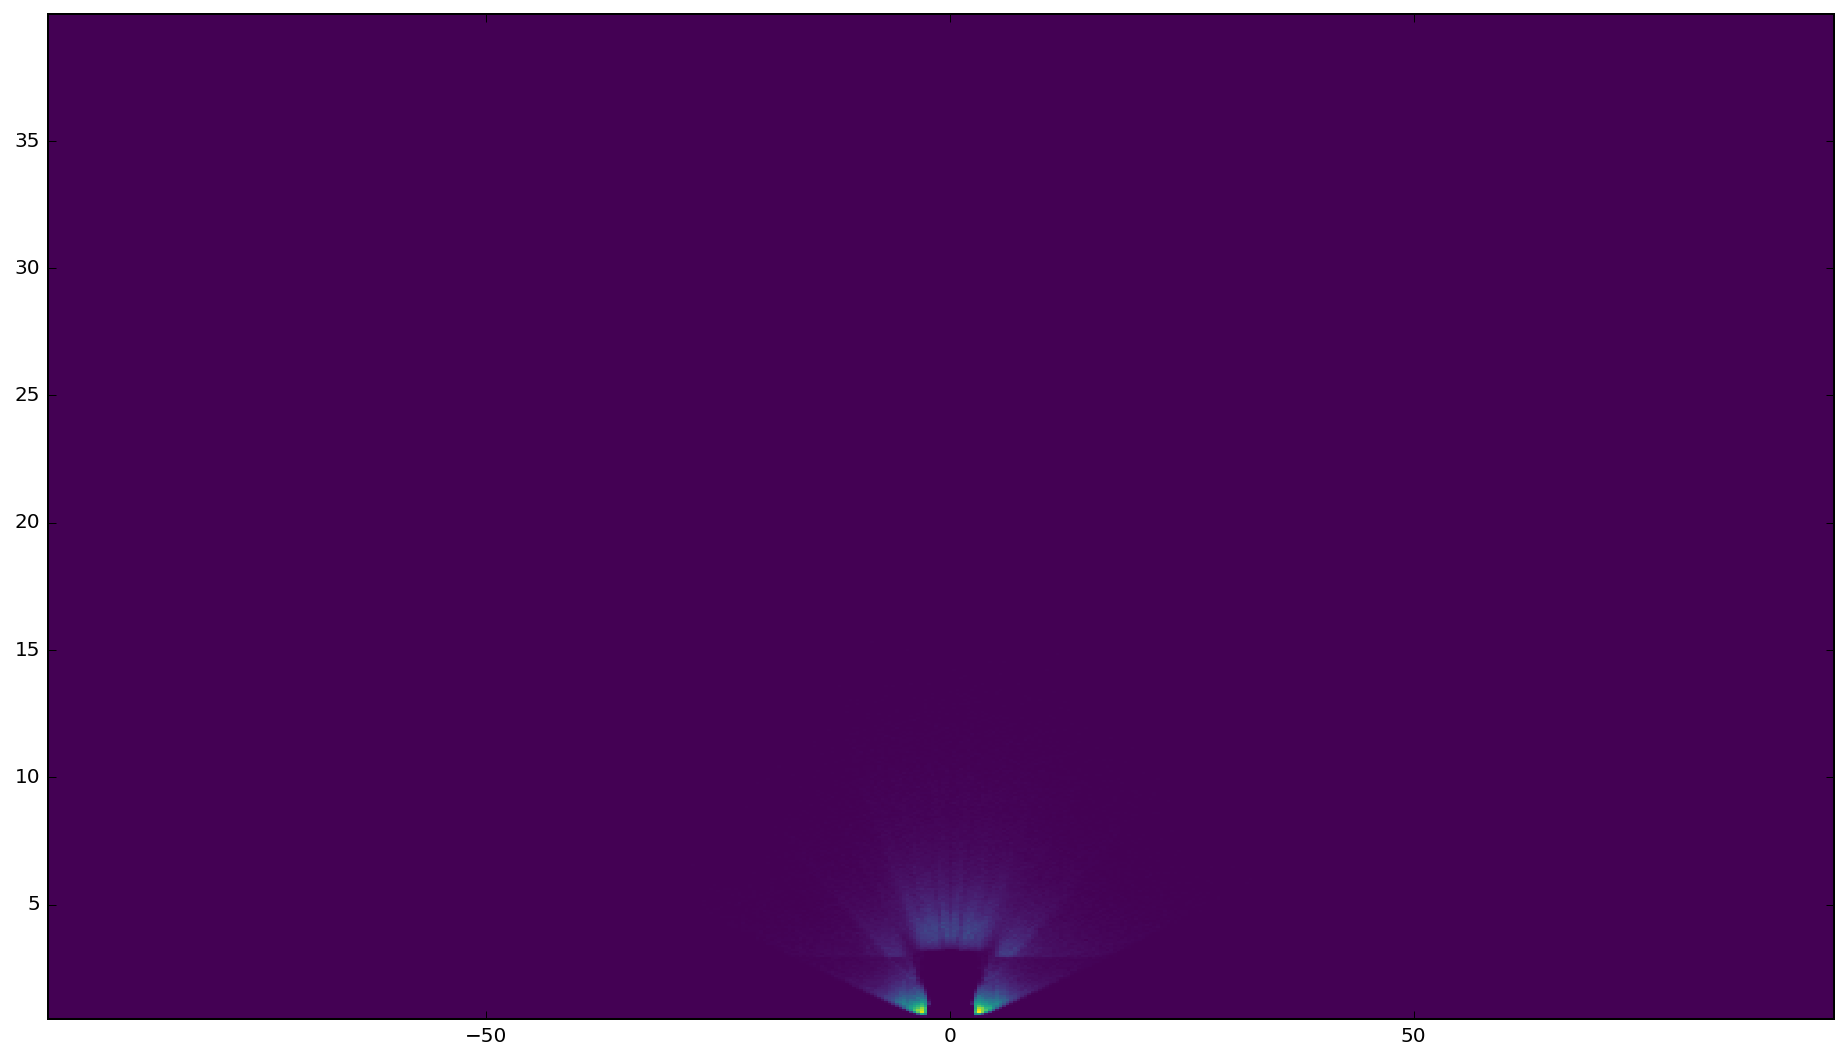

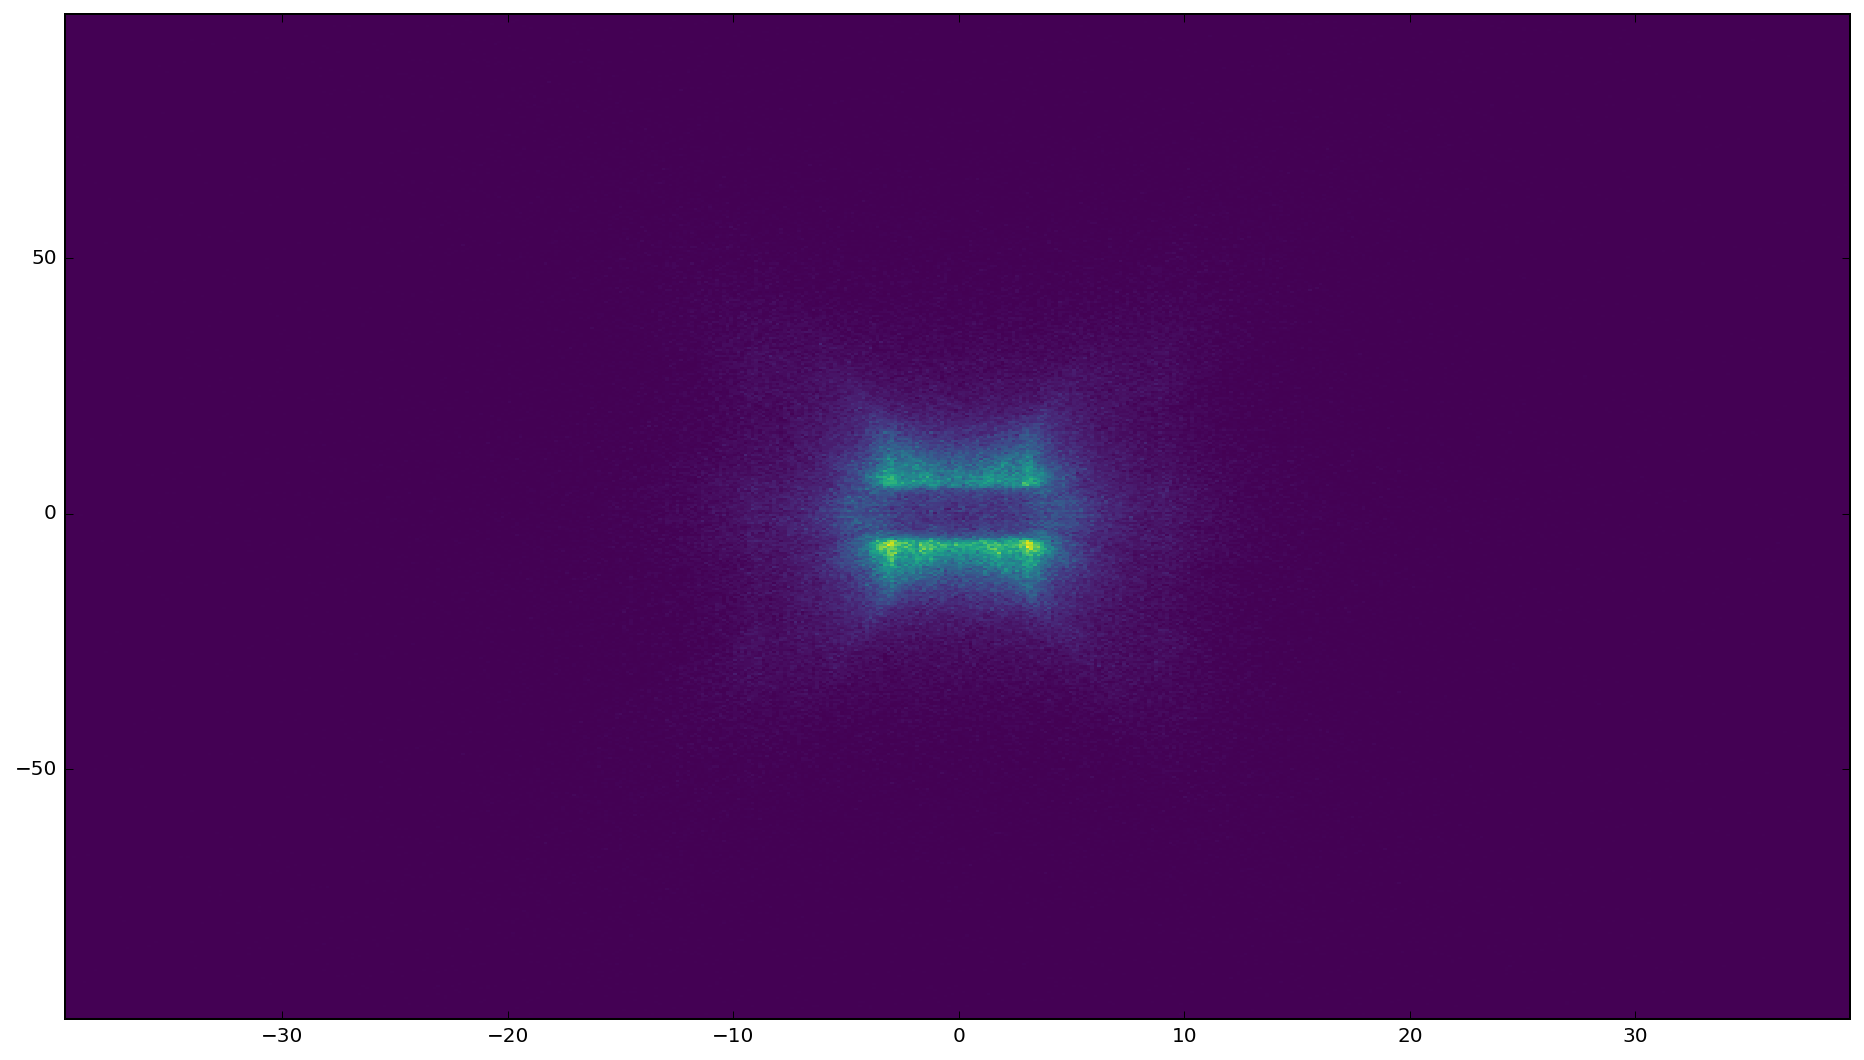

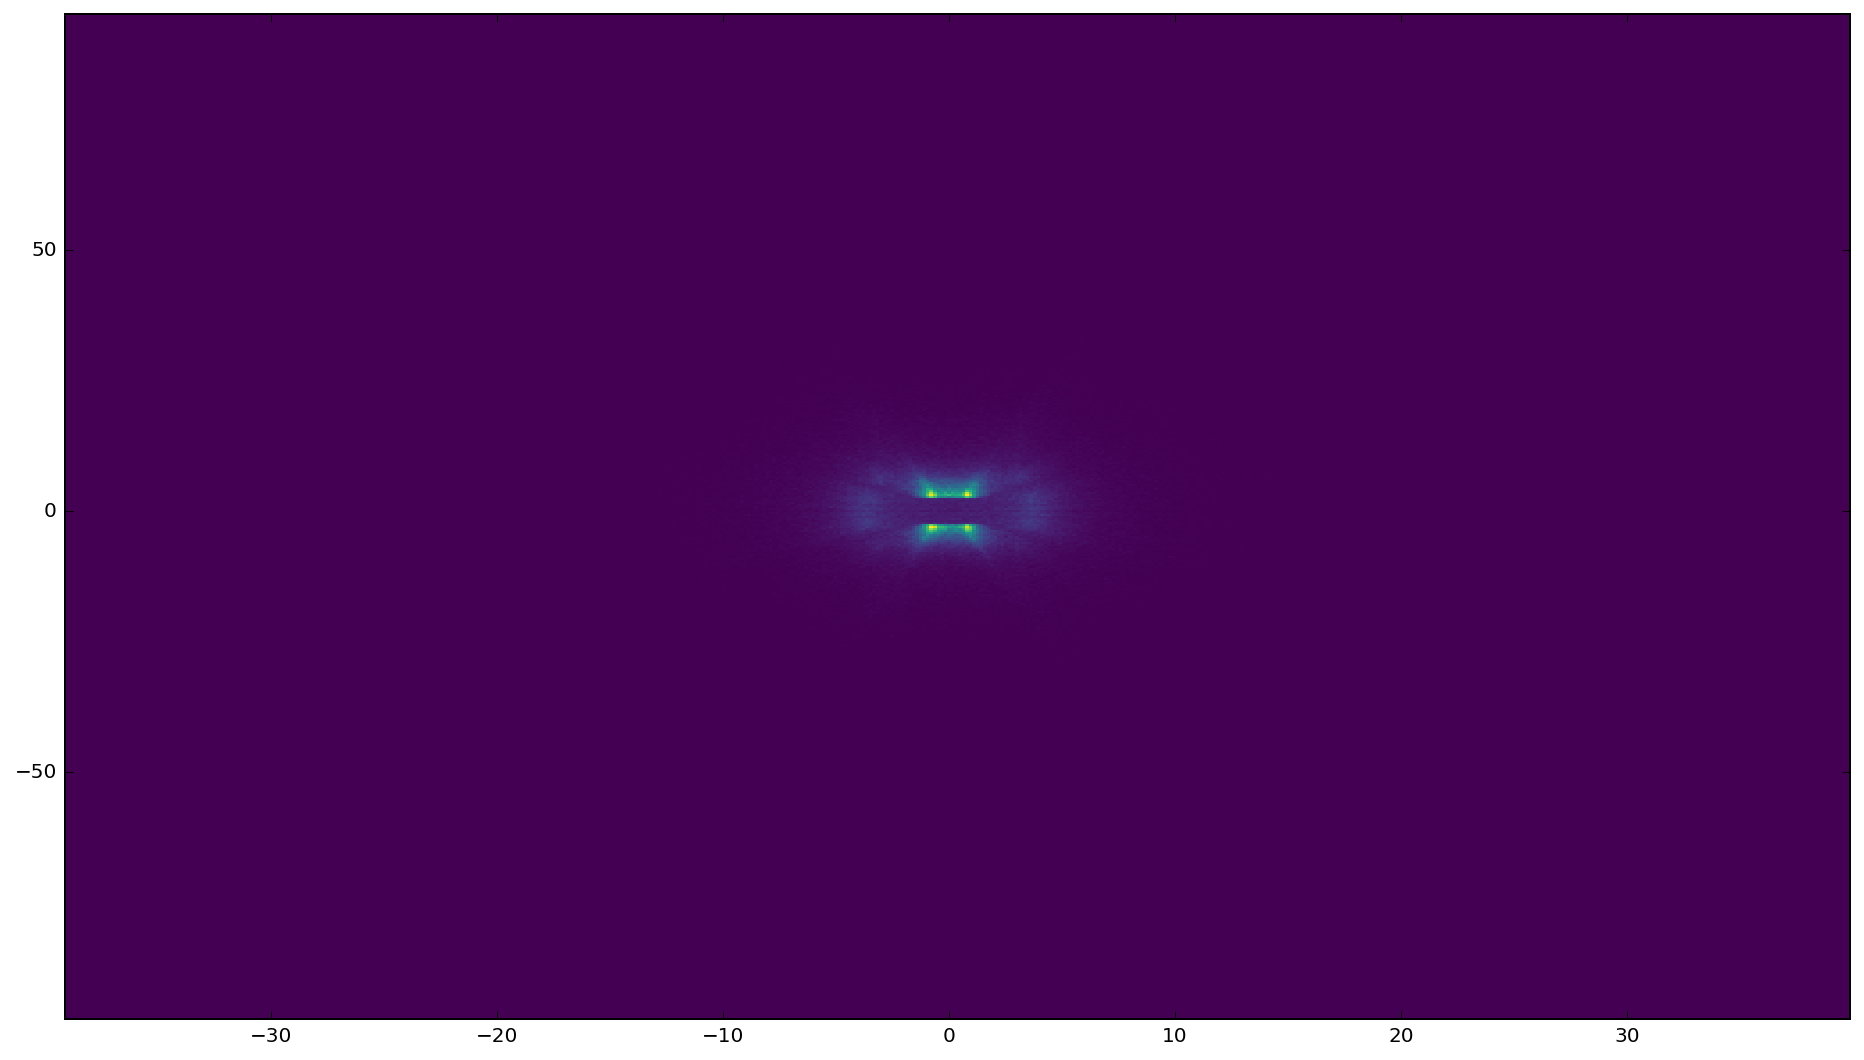

In [4]:
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
plt.hist2d(muon.pz2,muon.pt2,bins=500,cmap='viridis')
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
plt.hist2d(muon.px1,muon.pz1,bins=500,cmap='viridis')
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
plt.hist2d(muon.px2,muon.pz2,bins=500,cmap='viridis')
plt.show()

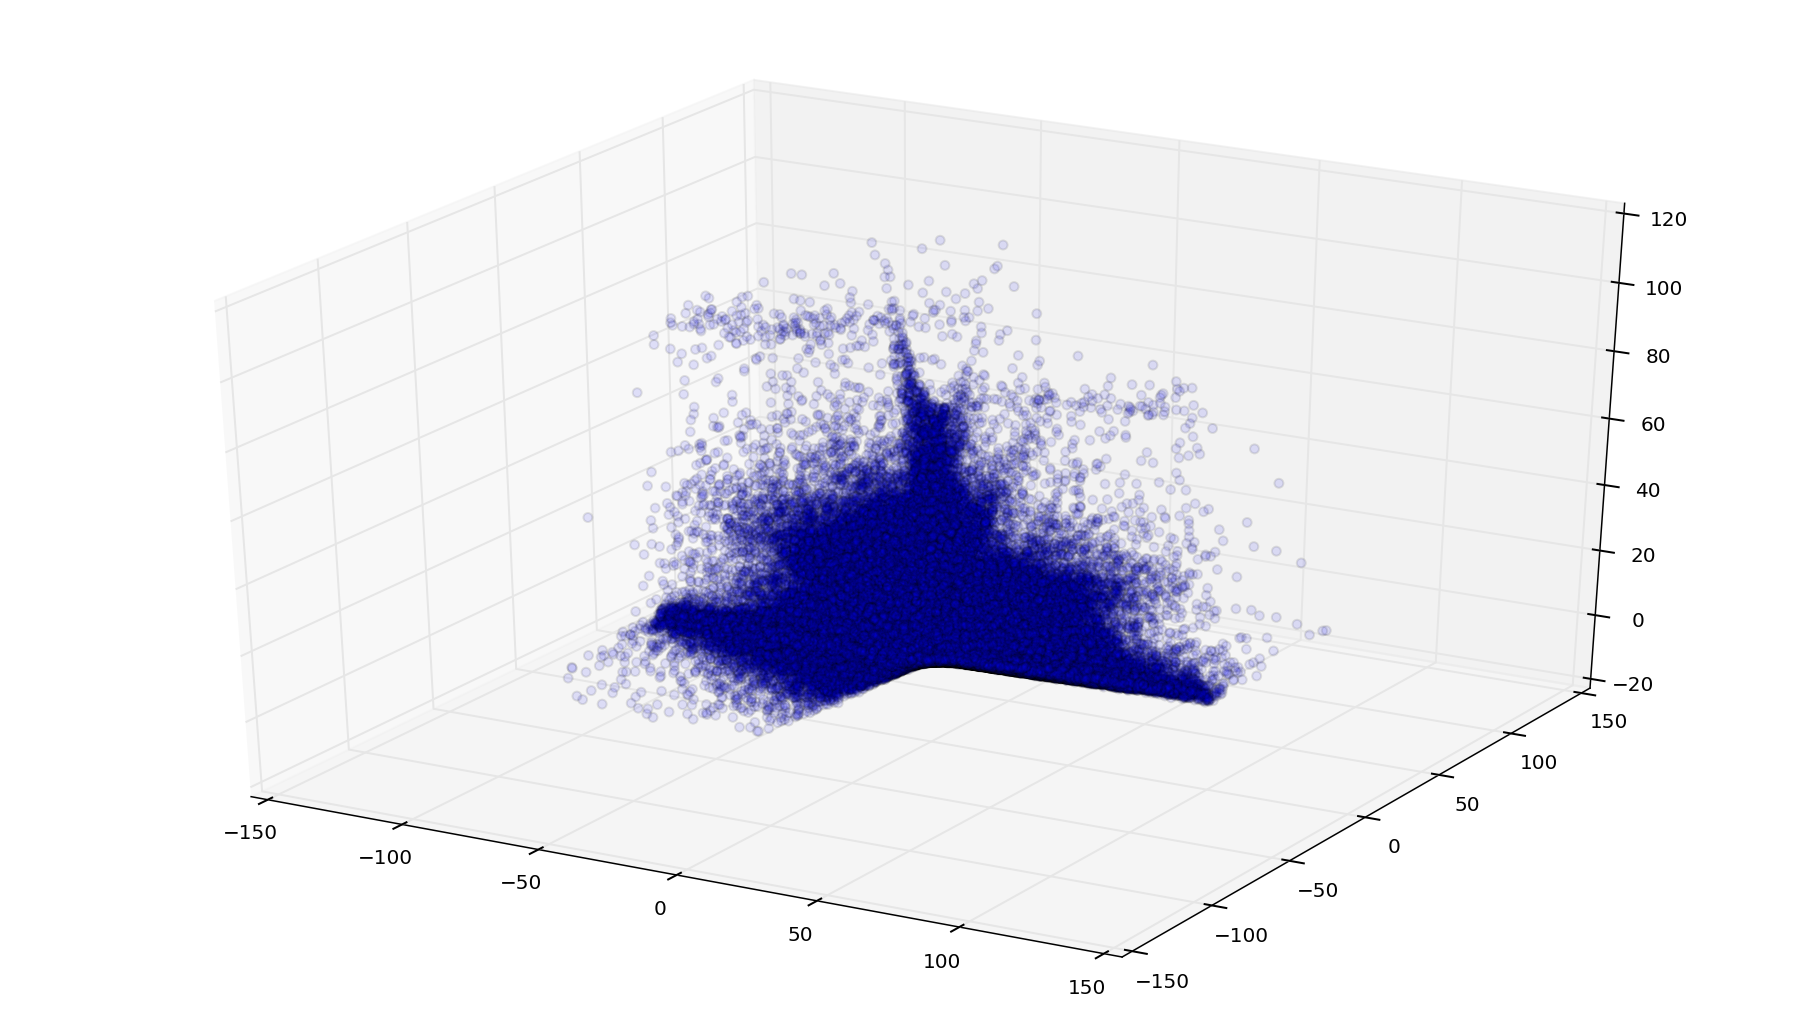

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
fig = plt.figure(num=None, figsize=(16,9), dpi=200, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')

#mus = muon.T
#uniq_mus = np.unique(mus)
#values = cm.viridis(np.linspace(0,1,len(uniq_mus)))
#values = cm.Paired(np.linspace(0,1,len(uniq_mom)))
#col = dict(zip(uniq_mus, values))


#for mu in uniq_mus:
#    xs = muon.px1
#    ys = muon.py1
#    zs = muon.pz1
#    ax.scatter(xs, ys, zs,alpha=1,color=col[mu])
ax.scatter(muon.pz1, muon.pz2, muon.M,alpha=0.1)
plt.show()